In [1]:
# day29

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("car_service_data.csv")

In [6]:
df

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,Location
0,1,Oil Change,$25,$50,10,$100,Urban
1,2,Brake Repair,$200,$500,5,$50,Suburban
2,3,Tire Rotation,$30,$75,12,$150,Rural
3,4,Transmission Repair,$1000,$2500,2,$200,Urban
4,5,Battery Replacement,$150,$300,8,$75,Suburban
5,6,Engine Diagnostic,$75,$200,15,$50,Rural
6,7,AC Recharge,$100,$250,7,$100,Urban
7,8,Suspension Repair,$500,$1200,3,$150,Suburban
8,9,Radiator Flush,$50,$125,20,$100,Rural
9,10,Detailing,$200,$400,6,$50,Urban


In [11]:
df.columns

Index(['Service ID', 'Service Type', 'Service Cost', 'Service Revenue',
       'Number of Customers', 'Advertising Cost', 'Location'],
      dtype='object')

In [32]:
df["Service Cost"] = [ int(x.replace("$" , "")) for x in df["Service Cost"]]
df["Service Revenue"] = [ int(x.replace("$" , "")) for x in df["Service Revenue"]]
df["Advertising Cost"] = [ int(x.replace("$" , "")) for x in df["Advertising Cost"]]

In [33]:
df

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,Location
0,1,Oil Change,25,50,10,100,Urban
1,2,Brake Repair,200,500,5,50,Suburban
2,3,Tire Rotation,30,75,12,150,Rural
3,4,Transmission Repair,1000,2500,2,200,Urban
4,5,Battery Replacement,150,300,8,75,Suburban
5,6,Engine Diagnostic,75,200,15,50,Rural
6,7,AC Recharge,100,250,7,100,Urban
7,8,Suspension Repair,500,1200,3,150,Suburban
8,9,Radiator Flush,50,125,20,100,Rural
9,10,Detailing,200,400,6,50,Urban


In [51]:
df2  = df.groupby("Location").sum()
df2

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost
Location,,,,,,
Rural,63,Tire RotationEngine DiagnosticRadiator FlushFu...,655,1650,72,575
Suburban,77,Brake RepairBattery ReplacementSuspension Repa...,2050,4950,67,625
Urban,70,Oil ChangeTransmission RepairAC RechargeDetail...,2225,5350,42,750


In [52]:
df2.loc[df2["Service Cost"] == df2["Service Cost"].max()]

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost
Location,,,,,,
Urban,70,Oil ChangeTransmission RepairAC RechargeDetail...,2225,5350,42,750


In [53]:
import matplotlib.pyplot as plt

In [54]:
import seaborn as sns

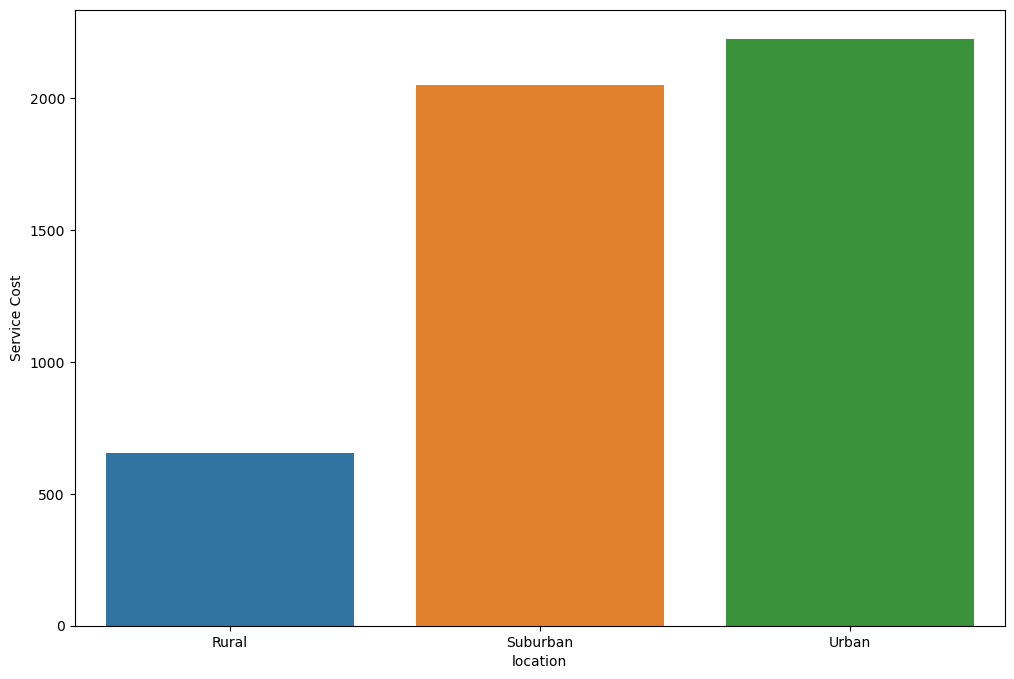

In [55]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = df2.index , y = "Service Cost" , data = df2)
plt.xlabel("location")
plt.ylabel("Service Cost")
plt.show()

In [56]:
df2.loc[df2["Number of Customers"] == df2["Number of Customers"].max()]

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost
Location,,,,,,
Rural,63,Tire RotationEngine DiagnosticRadiator FlushFu...,655,1650,72,575


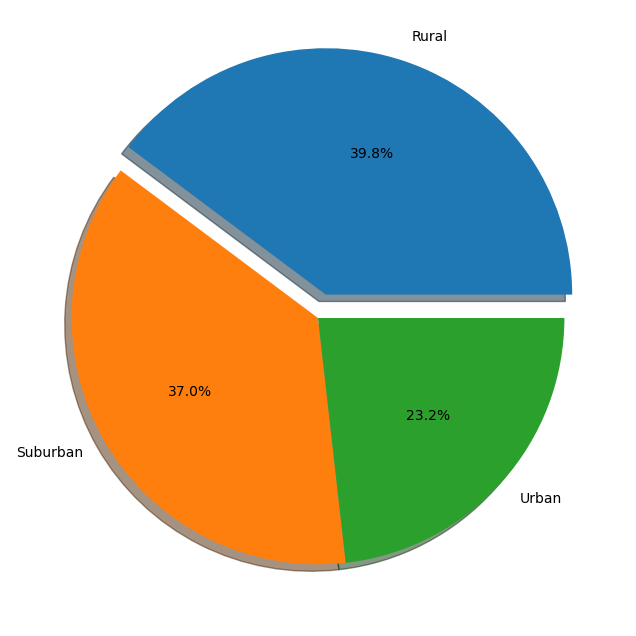

In [58]:
plt.figure(figsize = (12,8))
plt.pie(df2["Number of Customers"], explode=(0.1,0,0),
       labels=df2.index,
       autopct = '%1.1f%%',
       shadow = True,
       )
plt.show()

In [59]:
df2

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost
Location,,,,,,
Rural,63,Tire RotationEngine DiagnosticRadiator FlushFu...,655,1650,72,575
Suburban,77,Brake RepairBattery ReplacementSuspension Repa...,2050,4950,67,625
Urban,70,Oil ChangeTransmission RepairAC RechargeDetail...,2225,5350,42,750


In [99]:
df2["profit"] = (df2["Service Cost"] - df2["Service Revenue"]).abs()

In [100]:
df2["profit_per"] = (df2["profit"]/df2["Service Revenue"])*100
df2["profit_per"] = df2["profit_per"].astype(object)

In [101]:
df2["profit_per"] = df2["profit_per"].apply(lambda x: '{:.1f}%'.format(x))

In [103]:
df2["profit_per"]

Location
Rural       60.3%
Suburban    58.6%
Urban       58.4%
Name: profit_per, dtype: object

In [104]:
df2["profit_per_adv"] = (df2["Advertising Cost"]/df2["Service Revenue"])*100
df2["profit_per_adv"] = df2["profit_per_adv"].apply(lambda x: '{:.1f}%'.format(x))

In [105]:
df2

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,profit,profit_per,profit_per_adv
Location,,,,,,,,,
Rural,63,Tire RotationEngine DiagnosticRadiator FlushFu...,655,1650,72,575,995,60.3%,34.8%
Suburban,77,Brake RepairBattery ReplacementSuspension Repa...,2050,4950,67,625,2900,58.6%,12.6%
Urban,70,Oil ChangeTransmission RepairAC RechargeDetail...,2225,5350,42,750,3125,58.4%,14.0%


In [108]:
df2["rank"] = (df2["Advertising Cost"]/df2["Service Revenue"]).rank(ascending = False).astype(int)

In [109]:
df2

,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,profit,profit_per,profit_per_adv,rank
Location,,,,,,,,,,
Rural,63,Tire RotationEngine DiagnosticRadiator FlushFu...,655,1650,72,575,995,60.3%,34.8%,1
Suburban,77,Brake RepairBattery ReplacementSuspension Repa...,2050,4950,67,625,2900,58.6%,12.6%,3
Urban,70,Oil ChangeTransmission RepairAC RechargeDetail...,2225,5350,42,750,3125,58.4%,14.0%,2
